# "Studying Impact of Institutional Investors on a Equity stock performance"
> "Stocks which has highest percentage of Institutional Holdings are less voltaile and less risky compared to the stocks with less institutional holdings"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hariprasad Puduru
- categories: [fastpages, jupyter]



## Appraoch
#### I will be taking 5 years closing price data of 10 equity stocks and S&P500 for analysis. Out of 10, five stocks have more than 99% instituional Holdings and other five stocks have less than 0.5% instituitonal holdings. The idea behind this is to see if Instituional has any say on the stock performance. Nasadaq and finviz is used to pick the 10 stocks shown below for analysis.
### Stocks with >99 % instituional holdings
#### 1. Hilton Grand Vaccations Inc (HGV)
#### 2. Hilton Worldwide Holdings Inc (HLV)
#### 3. Berry Global Group Inc (BERY)
#### 4. Catalent Inc (CTLT)
#### 5. RE/MAX Holdings Inc (RMAX)

### Stocks with <0.5 % instituional holdings
#### 1. Interlink Electronics Inc (LINK)
#### 2. Planet Green Holdings Corp(PLAG)
#### 3. Color Star Technology Co Ltd (CSCW)
#### 4. Agile Therapeutics Inc. (AGRX)
#### 5. Newegg Commerce Inc (NEGG)



In [31]:
#Importing pandas, numpy,matplotlib, Pandas Data Reader  python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import pandas_datareader as data
import seaborn as sns

In [2]:
-#Importing Assests excel data sheet and storing in the  assests data Frame. 
#Excel sheet consists of 5 years of close prce data for the 10 stocks and s&p500
#Stock data date range 2017-09-01 to 2022-08-31
assets = pd.read_excel('stockdatafinal.xlsx')
assets.head()

,Date,HGV,HLT,BERY,CTLT,RMAX,LINK,PLAG,CSCW,AGRX,NEGG,SP500
0,2017-09-01,36.540001,64.589996,56.849998,40.660000,63.299999,7.15,10.00,1.60,138.000000,10.08,2476.550049
1,2017-09-05,36.110001,63.599998,56.270000,41.369999,61.599998,7.15,10.75,1.63,135.600006,10.24,2457.850098
2,2017-09-06,35.650002,63.669998,56.000000,41.669998,61.150002,7.15,10.50,1.65,133.600006,10.32,2465.540039
3,2017-09-07,35.599998,63.889999,56.450001,41.349998,60.400002,7.58,10.00,1.70,135.600006,10.08,2465.100098
4,2017-09-08,35.299999,65.139999,56.310001,40.349998,60.500000,7.23,9.75,1.65,138.800003,10.08,2461.429932


In [3]:
#setting the date as Index of the data frame
assets=assets.set_index(pd.DatetimeIndex(assets['Date'].values))
#Remove or drop the date column
assets.drop(['Date'],inplace=True,axis=1)

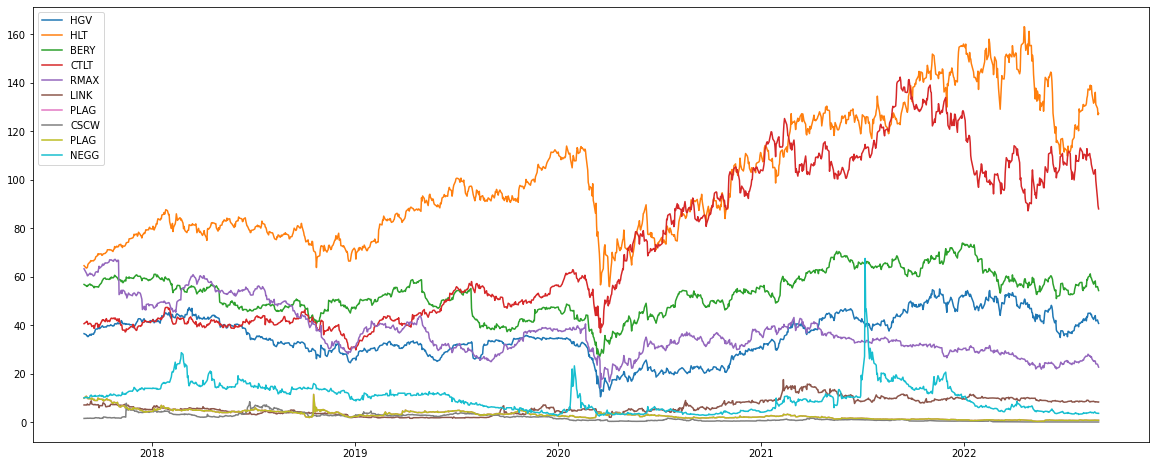

In [33]:
#Plotting the close price of all the 10 stocks.
plt.plot(assets['HGV'],label='HGV')
plt.plot(assets['HLT'],label='HLT')
plt.plot(assets['BERY'],label='BERY')
plt.plot(assets['CTLT'],label='CTLT')
plt.plot(assets['RMAX'],label='RMAX')
plt.plot(assets['LINK'],label='LINK')
plt.plot(assets['PLAG'],label='PLAG')
plt.plot(assets['CSCW'],label='CSCW')
plt.plot(assets['PLAG'],label='PLAG')
plt.plot(assets['NEGG'],label='NEGG')
plt.legend()
plt.show()

In [37]:
#Get the simple daily returns of the assets using percent change function
daily_simple_returns = assets.pct_change().dropna()
#printing the daily returns
daily_simple_returns

,HGV,HLT,BERY,CTLT,RMAX,LINK,PLAG,CSCW,AGRX,NEGG,SP500
2017-09-05,-0.011768,-0.015327,-0.010202,0.017462,-0.026856,0.000000,0.075000,0.018750,-0.017391,0.015873,-0.007551
2017-09-06,-0.012739,0.001101,-0.004798,0.007252,-0.007305,0.000000,-0.023256,0.012270,-0.014749,0.007812,0.003129
2017-09-07,-0.001403,0.003455,0.008036,-0.007679,-0.012265,0.060140,-0.047619,0.030303,0.014970,-0.023256,-0.000178
2017-09-08,-0.008427,0.019565,-0.002480,-0.024184,0.001656,-0.046174,-0.025000,-0.029412,0.023599,0.000000,-0.001489
2017-09-11,0.019830,0.012435,0.012076,0.010905,0.014050,0.000000,0.000000,0.030303,0.014409,0.007937,0.010839
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.011494,0.020855,0.011975,0.014704,0.007171,-0.017176,-0.022472,0.000000,-0.038462,-0.044186,0.014092
2022-08-26,-0.050000,-0.036670,-0.044075,-0.043186,-0.046677,0.016280,-0.022989,0.000000,-0.046667,-0.068127,-0.033688
2022-08-29,0.009569,-0.012358,0.004126,-0.074423,-0.005394,-0.016490,-0.023529,0.000000,-0.011655,-0.036554,-0.006666
2022-08-30,-0.019431,-0.020391,-0.014115,-0.032510,-0.027117,0.010778,0.048193,0.000000,-0.056604,0.021680,-0.011028


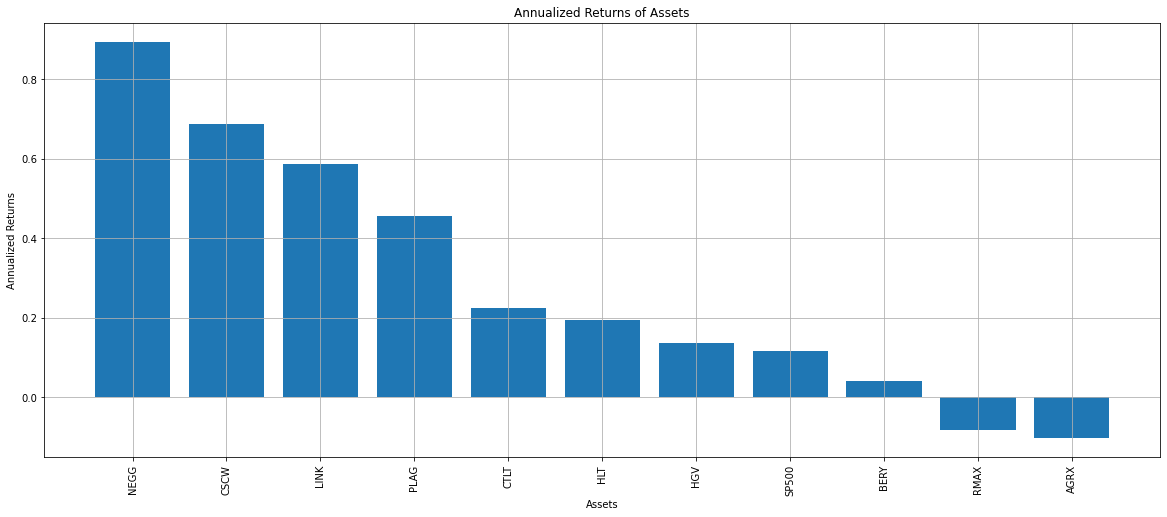

In [34]:
#Calculating annualized returns from the daily simple returns
annualized_returns=daily_simple_returns.mean()*252
#sorting the annualized returns and displaying them high to low
sorted_annualized_returns = annualized_returns.sort_values(ascending=False)
plt.bar(sorted_annualized_returns.index,sorted_annualized_returns)
plt.ylabel('Annualized Returns')
plt.xlabel('Assets')
plt.title('Annualized Returns of Assets')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### 8 out of 10 stocks outperformed s&p 500 index over the last 5 years when calculated annualized returns, while two stocks gave negative returns. Those two stocks belongs to the group of less institutional holdings.


#### Next  we will be plotting series of histogram plots for each stock. we plot out the histogram using the .hist method and we specify the number of bins we want. The thicker our histogram is the more volatile the stock is.The width of the histogram shape is related to the standard deviation of the distribution. The higher it is the more variants we have, the variants of a certain distribution are directly related to the standard deviation. It’s actually the square value of the standard deviation, the higher the standard deviation is, the higher the variance is. The more volatility we have in terms of stock analysis.

In [ ]:
#Ploting Daily simple returns using histogram chart for the group of stock whose institutional holdings are >99%

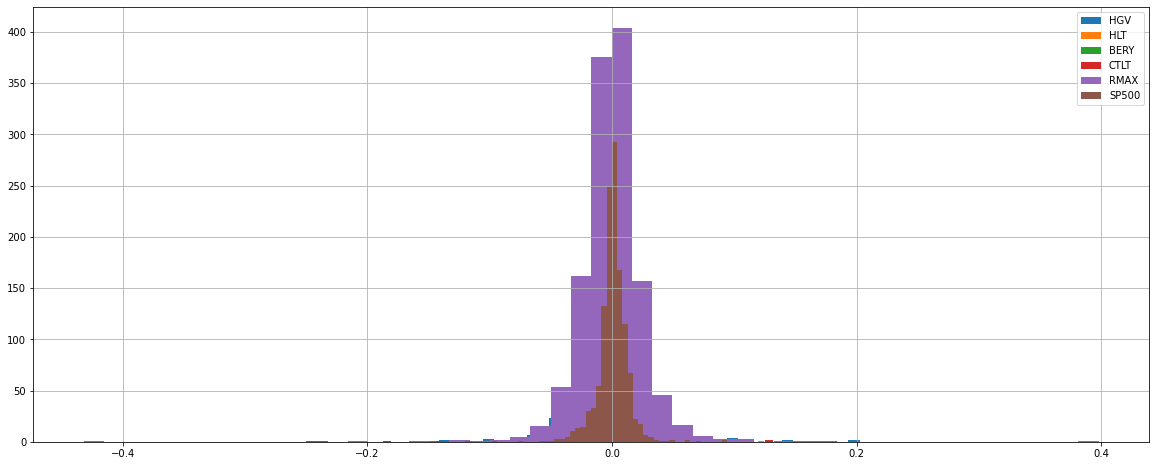

In [35]:
daily_simple_returns['HGV'].hist(bins=50, label='HGV')
daily_simple_returns['HLT'].hist(bins=50, label='HLT')
daily_simple_returns['BERY'].hist(bins=50, label='BERY')
daily_simple_returns['CTLT'].hist(bins=50, label='CTLT')
daily_simple_returns['RMAX'].hist(bins=50, label='RMAX')
daily_simple_returns['SP500'].hist(bins=50, label='SP500')
plt.legend()
plt.show()

In [ ]:
#Ploting Daily simple returns using histogram chart for the group of stock whose institutional holdings are < 0.5%

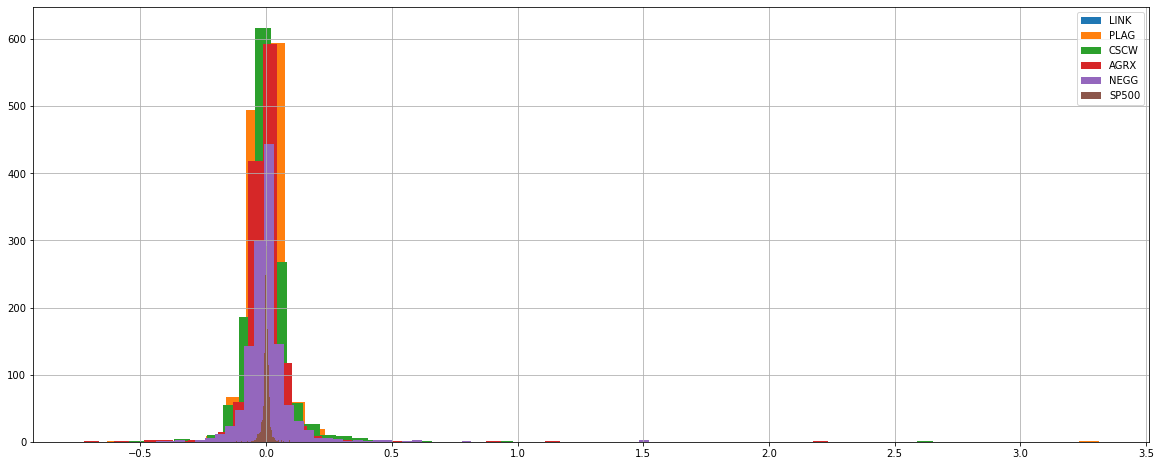

In [36]:
daily_simple_returns['LINK'].hist(bins=50, label='LINK')
daily_simple_returns['PLAG'].hist(bins=50, label='PLAG')
daily_simple_returns['CSCW'].hist(bins=50, label='CSCW')
daily_simple_returns['AGRX'].hist(bins=50, label='AGRX')
daily_simple_returns['NEGG'].hist(bins=50, label='NEGG')
daily_simple_returns['SP500'].hist(bins=50, label='SP500')
plt.legend()
plt.show()

### The above two histogram charts shows us that, first group of stocks are more of normally distributed while seond group of stocks skewed to left more. first group is not wide spread that means it's less voltail compared to second group.

           mean       std
HGV    0.136565  0.477125
HLT    0.192519  0.337587
BERY   0.040886  0.315224
CTLT   0.223504  0.371087
RMAX  -0.082397  0.482823
LINK   0.585431  1.059428
PLAG   0.454834  1.828110
CSCW   0.686196  1.824875
AGRX  -0.101977  1.633032
NEGG   0.889888  1.654327
SP500  0.115511  0.209256


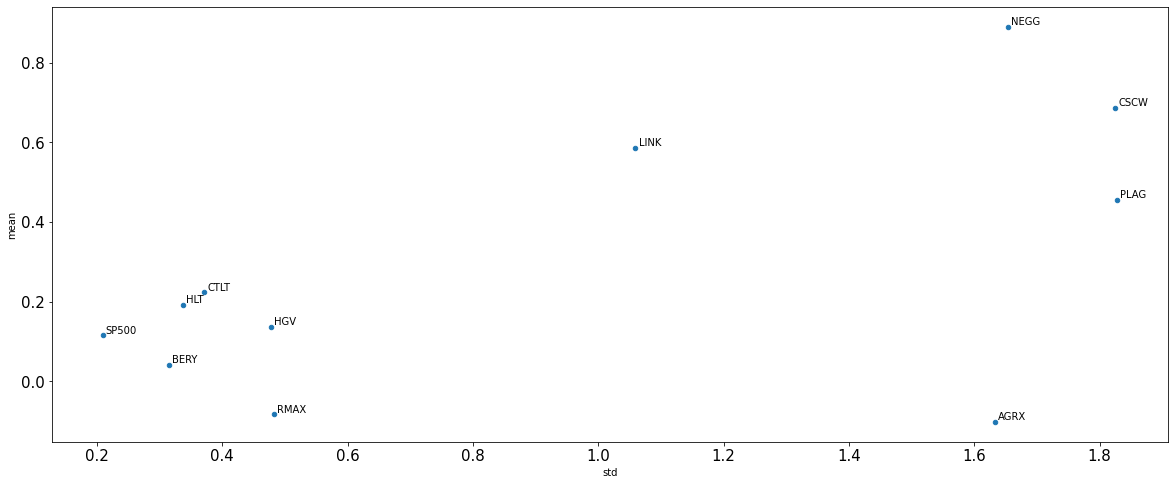

In [48]:
#Calculating mean and standard deviation of daily simple returns using describe function
daily_simple_returns.describe()
#we are interested only in mean and standar deviation so we will be ignoring other parameters from decribe() function 
#and copying the output into a different 
dailyreturns_mean_std= daily_simple_returns.describe().T.loc[:,["mean","std"]]
#print(dailyreturns_mean_std)

#converting mean and std into yearly
dailyreturns_mean_std["mean"] = dailyreturns_mean_std["mean"]*251
dailyreturns_mean_std["std"] = dailyreturns_mean_std["std"]*np.sqrt(251)
print(dailyreturns_mean_std)
#Plotting the standard deviation and mean using scatter plot
dailyreturns_mean_std.plot.scatter(fontsize=15, x="std",y="mean")
for idx in dailyreturns_mean_std.index:
    plt.annotate(idx,xy=(dailyreturns_mean_std.loc[idx,"std"]+0.005,dailyreturns_mean_std.loc[idx,"mean"]+0.005))
  

#### Above scatter plot clearly indicates High instituional holdings stock and S&P 500 are close to each other and their mean and standard deviations are less compared to low institutional holdings stock. This indicates instituional investors invest in stock which are less risky.

In [54]:
log_daily_returns=assets.pct_change().apply(lambda x:np.log(1+x))
log_daily_returns = log_daily_returns.dropna()
log_daily_returns

,HGV,HLT,BERY,CTLT,RMAX,LINK,PLAG,CSCW,AGRX,NEGG,SP500
2017-09-05,-0.011838,-0.015446,-0.010255,0.017311,-0.027223,0.000000,0.072321,0.018576,-0.017544,0.015748,-0.007579
2017-09-06,-0.012821,0.001100,-0.004810,0.007225,-0.007332,0.000000,-0.023530,0.012195,-0.014859,0.007782,0.003124
2017-09-07,-0.001404,0.003449,0.008004,-0.007709,-0.012341,0.058401,-0.048790,0.029853,0.014859,-0.023530,-0.000178
2017-09-08,-0.008463,0.019376,-0.002483,-0.024481,0.001654,-0.047274,-0.025318,-0.029853,0.023325,0.000000,-0.001490
2017-09-11,0.019636,0.012358,0.012004,0.010846,0.013952,0.000000,0.000000,0.029853,0.014306,0.007905,0.010781
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.011429,0.020641,0.011904,0.014597,0.007146,-0.017326,-0.022728,0.000000,-0.039221,-0.045192,0.013993
2022-08-26,-0.051293,-0.037359,-0.045076,-0.044146,-0.047802,0.016149,-0.023257,0.000000,-0.047791,-0.070558,-0.034269
2022-08-29,0.009524,-0.012435,0.004118,-0.077338,-0.005409,-0.016627,-0.023811,0.000000,-0.011723,-0.037238,-0.006689
2022-08-30,-0.019623,-0.020602,-0.014215,-0.033050,-0.027492,0.010721,0.047068,0.000000,-0.058269,0.021449,-0.011089
